## This notebook are the running results for variant  
## ConvPool_CNN_C net

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import sampler

import help_func
import new_ALL_Conv

right


In [2]:
train_batch_size = 4
test_batch_size = 4

NUM_TRAIN = 49000

transform = transforms.Compose(
          [transforms.ToTensor(),
           transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

cifar10_train = torchvision.datasets.CIFAR10('./cs231n/datasets', train=True, download=True,
                             transform=transform)
loader_train = torch.utils.data.DataLoader(cifar10_train, batch_size=train_batch_size, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = torchvision.datasets.CIFAR10('./cs231n/datasets', train=True, download=True,
                           transform=transform)
loader_val = torch.utils.data.DataLoader(cifar10_val, batch_size=train_batch_size, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

cifar10_test = torchvision.datasets.CIFAR10('./cs231n/datasets', train=False, download=True, 
                            transform=transform)
loader_test = torch.utils.data.DataLoader(cifar10_test, batch_size=test_batch_size)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
class ConvPool_CNN_C(nn.Module):
    def __init__(self, num_classes=100):
        super (ConvPool_CNN_C, self).__init__()
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv1.weight)
        nn.init.constant_(self.conv1.bias, 0)
        
        self.dropout1 = nn.Dropout2d(0.2)
        
        self.conv2 = nn.Conv2d(96, 96, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv2.weight)
        nn.init.constant_(self.conv2.bias, 0)
        
        self.conv3 = nn.Conv2d(96, 96, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv3.weight)
        nn.init.constant_(self.conv3.bias, 0)
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.dropout2 = nn.Dropout(0.5)
        
        self.conv4 = nn.Conv2d(96, 192, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv4.weight)
        nn.init.constant_(self.conv4.bias, 0)
        
        self.conv5 = nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv5.weight)
        nn.init.constant_(self.conv5.bias, 0)
        
        self.conv6 = nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv6.weight)
        nn.init.constant_(self.conv6.bias, 0)
        
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.dropout3 = nn.Dropout(0.5)
        
        self.conv7 = nn.Conv2d(192, 192, kernel_size=3, padding=3)
        nn.init.kaiming_normal_(self.conv7.weight)
        nn.init.constant_(self.conv7.bias, 0)
        
        self.conv8 = nn.Conv2d(192, 192, kernel_size=1)
        nn.init.kaiming_normal_(self.conv8.weight)
        nn.init.constant_(self.conv8.bias, 0)
        
        self.conv9 = nn.Conv2d(192, self.num_classes, kernel_size=1)
        nn.init.kaiming_normal_(self.conv9.weight)
        nn.init.constant_(self.conv9.bias, 0)
        
        self.glb_avg = nn.AvgPool2d(6)
        
    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.dropout1(out)
        
        out = self.conv2(out)
        out = F.relu(out)
        
        out = self.conv3(out)
        out = F.relu(out)
        
        out = self.maxpool1(out)
        out = self.dropout2(out)
        
        out = self.conv4(out)
        out = F.relu(out)
        
        out = self.conv5(out)
        out = F.relu(out)
        
        out = self.conv6(out)
        out = F.relu(out)
        
        out = self.maxpool2(out)
        out = self.dropout3(out)
        
        out = self.conv7(out)
        out = F.relu(out)
        
        out = self.conv8(out)
        out = F.relu(out)
        
        out = self.conv9(out)
        out = F.relu(out)
        
        out = self.glb_avg(out)
        out = out.view(-1, self.num_classes)
        return out
orig_convpool_cnn_c = ConvPool_CNN_C(num_classes=10)


using device: cuda
begin training
Checking accuracy on validation set
Got 105 / 1000 correct (10.50)
1 epoch,  1000 iteration, loss:2.309
Checking accuracy on validation set
Got 150 / 1000 correct (15.00)
1 epoch,  2000 iteration, loss:2.291
Checking accuracy on validation set
Got 203 / 1000 correct (20.30)
1 epoch,  3000 iteration, loss:2.259
Checking accuracy on validation set
Got 256 / 1000 correct (25.60)
1 epoch,  4000 iteration, loss:2.202
Checking accuracy on validation set
Got 261 / 1000 correct (26.10)
1 epoch,  5000 iteration, loss:2.111
Checking accuracy on validation set
Got 273 / 1000 correct (27.30)
1 epoch,  6000 iteration, loss:2.063
Checking accuracy on validation set
Got 307 / 1000 correct (30.70)
1 epoch,  7000 iteration, loss:1.937
Checking accuracy on validation set
Got 297 / 1000 correct (29.70)
1 epoch,  8000 iteration, loss:1.817
Checking accuracy on validation set
Got 394 / 1000 correct (39.40)
1 epoch,  9000 iteration, loss:1.775
Checking accuracy on validatio

Got 758 / 1000 correct (75.80)
7 epoch,  4000 iteration, loss:0.737
Checking accuracy on validation set
Got 772 / 1000 correct (77.20)
7 epoch,  5000 iteration, loss:0.710
Checking accuracy on validation set
Got 745 / 1000 correct (74.50)
7 epoch,  6000 iteration, loss:0.736
Checking accuracy on validation set
Got 758 / 1000 correct (75.80)
7 epoch,  7000 iteration, loss:0.729
Checking accuracy on validation set
Got 755 / 1000 correct (75.50)
7 epoch,  8000 iteration, loss:0.754
Checking accuracy on validation set
Got 756 / 1000 correct (75.60)
7 epoch,  9000 iteration, loss:0.753
Checking accuracy on validation set
Got 742 / 1000 correct (74.20)
7 epoch, 10000 iteration, loss:0.747
Checking accuracy on validation set
Got 746 / 1000 correct (74.60)
7 epoch, 11000 iteration, loss:0.723
Checking accuracy on validation set
Got 782 / 1000 correct (78.20)
7 epoch, 12000 iteration, loss:0.741
 num 6 epoch 
####### Training Loss #######
[0.72057791]
Checking accuracy on validation set
Got 786

Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
13 epoch,  8000 iteration, loss:0.584
Checking accuracy on validation set
Got 792 / 1000 correct (79.20)
13 epoch,  9000 iteration, loss:0.571
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
13 epoch, 10000 iteration, loss:0.569
Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
13 epoch, 11000 iteration, loss:0.568
Checking accuracy on validation set
Got 790 / 1000 correct (79.00)
13 epoch, 12000 iteration, loss:0.575
 num 12 epoch 
####### Training Loss #######
[0.55160565]
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
14 epoch,  1000 iteration, loss:0.529
Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
14 epoch,  2000 iteration, loss:0.510
Checking accuracy on validation set
Got 801 / 1000 correct (80.10)
14 epoch,  3000 iteration, loss:0.540
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
14 epoch,  4000 iteration, loss:0.5

Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
19 epoch, 11000 iteration, loss:0.494
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
19 epoch, 12000 iteration, loss:0.491
 num 18 epoch 
####### Training Loss #######
[0.47077833]
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
20 epoch,  1000 iteration, loss:0.463
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
20 epoch,  2000 iteration, loss:0.467
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
20 epoch,  3000 iteration, loss:0.462
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
20 epoch,  4000 iteration, loss:0.450
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
20 epoch,  5000 iteration, loss:0.477
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
20 epoch,  6000 iteration, loss:0.450
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
20 epoch,  7000 iteration, loss:0.4

Got 856 / 1000 correct (85.60)
26 epoch,  1000 iteration, loss:0.423
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
26 epoch,  2000 iteration, loss:0.416
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
26 epoch,  3000 iteration, loss:0.412
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
26 epoch,  4000 iteration, loss:0.417
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
26 epoch,  5000 iteration, loss:0.441
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
26 epoch,  6000 iteration, loss:0.437
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
26 epoch,  7000 iteration, loss:0.431
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
26 epoch,  8000 iteration, loss:0.443
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
26 epoch,  9000 iteration, loss:0.441
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
26 epoch, 10000 iteratio

Got 840 / 1000 correct (84.00)
32 epoch,  4000 iteration, loss:0.405
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
32 epoch,  5000 iteration, loss:0.386
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
32 epoch,  6000 iteration, loss:0.426
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
32 epoch,  7000 iteration, loss:0.406
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
32 epoch,  8000 iteration, loss:0.403
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
32 epoch,  9000 iteration, loss:0.409
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
32 epoch, 10000 iteration, loss:0.427
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
32 epoch, 11000 iteration, loss:0.433
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
32 epoch, 12000 iteration, loss:0.425
 num 31 epoch 
####### Training Loss #######
[0.39871843]
Checking accuracy on validation s

Got 860 / 1000 correct (86.00)
38 epoch,  7000 iteration, loss:0.377
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
38 epoch,  8000 iteration, loss:0.406
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
38 epoch,  9000 iteration, loss:0.385
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
38 epoch, 10000 iteration, loss:0.384
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
38 epoch, 11000 iteration, loss:0.397
Checking accuracy on validation set
Got 867 / 1000 correct (86.70)
38 epoch, 12000 iteration, loss:0.417
 num 37 epoch 
####### Training Loss #######
[0.37875151]
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
39 epoch,  1000 iteration, loss:0.351
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
39 epoch,  2000 iteration, loss:0.365
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
39 epoch,  3000 iteration, loss:0.374
Checking accuracy on validation s

Got 846 / 1000 correct (84.60)
44 epoch, 10000 iteration, loss:0.383
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
44 epoch, 11000 iteration, loss:0.377
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
44 epoch, 12000 iteration, loss:0.416
 num 43 epoch 
####### Training Loss #######
[0.36492798]
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
45 epoch,  1000 iteration, loss:0.333
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
45 epoch,  2000 iteration, loss:0.369
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
45 epoch,  3000 iteration, loss:0.345
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
45 epoch,  4000 iteration, loss:0.367
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
45 epoch,  5000 iteration, loss:0.368
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
45 epoch,  6000 iteration, loss:0.364
Checking accuracy on validation s

Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
51 epoch,  1000 iteration, loss:0.339
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
51 epoch,  2000 iteration, loss:0.330
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
51 epoch,  3000 iteration, loss:0.316
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
51 epoch,  4000 iteration, loss:0.355
Checking accuracy on validation set
Got 854 / 1000 correct (85.40)
51 epoch,  5000 iteration, loss:0.357
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
51 epoch,  6000 iteration, loss:0.355
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
51 epoch,  7000 iteration, loss:0.360
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
51 epoch,  8000 iteration, loss:0.347
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
51 epoch,  9000 iteration, loss:0.377
Checking accuracy on validation set
Got 854 / 1000 corr

Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
57 epoch,  4000 iteration, loss:0.346
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
57 epoch,  5000 iteration, loss:0.354
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
57 epoch,  6000 iteration, loss:0.353
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
57 epoch,  7000 iteration, loss:0.358
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
57 epoch,  8000 iteration, loss:0.352
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
57 epoch,  9000 iteration, loss:0.367
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
57 epoch, 10000 iteration, loss:0.374
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
57 epoch, 11000 iteration, loss:0.372
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
57 epoch, 12000 iteration, loss:0.380
 num 56 epoch 
####### Training Loss #######
[0.3448353

Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
63 epoch,  7000 iteration, loss:0.365
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
63 epoch,  8000 iteration, loss:0.365
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
63 epoch,  9000 iteration, loss:0.367
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
63 epoch, 10000 iteration, loss:0.361
Checking accuracy on validation set
Got 847 / 1000 correct (84.70)
63 epoch, 11000 iteration, loss:0.353
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
63 epoch, 12000 iteration, loss:0.352
 num 62 epoch 
####### Training Loss #######
[0.33805488]
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
64 epoch,  1000 iteration, loss:0.328
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
64 epoch,  2000 iteration, loss:0.329
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
64 epoch,  3000 iteration, loss:0.3

Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
69 epoch, 10000 iteration, loss:0.383
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
69 epoch, 11000 iteration, loss:0.354
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
69 epoch, 12000 iteration, loss:0.377
 num 68 epoch 
####### Training Loss #######
[0.33530422]
Checking accuracy on validation set
Got 866 / 1000 correct (86.60)
70 epoch,  1000 iteration, loss:0.301
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
70 epoch,  2000 iteration, loss:0.298
Checking accuracy on validation set
Got 869 / 1000 correct (86.90)
70 epoch,  3000 iteration, loss:0.325
Checking accuracy on validation set
Got 854 / 1000 correct (85.40)
70 epoch,  4000 iteration, loss:0.332
Checking accuracy on validation set
Got 871 / 1000 correct (87.10)
70 epoch,  5000 iteration, loss:0.349
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
70 epoch,  6000 iteration, loss:0.3

 num 74 epoch 
####### Training Loss #######
[0.32833838]
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
76 epoch,  1000 iteration, loss:0.302
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
76 epoch,  2000 iteration, loss:0.306
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
76 epoch,  3000 iteration, loss:0.308
Checking accuracy on validation set
Got 871 / 1000 correct (87.10)
76 epoch,  4000 iteration, loss:0.333
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
76 epoch,  5000 iteration, loss:0.348
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
76 epoch,  6000 iteration, loss:0.325
Checking accuracy on validation set
Got 868 / 1000 correct (86.80)
76 epoch,  7000 iteration, loss:0.352
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
76 epoch,  8000 iteration, loss:0.332
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
76 epoch,  9000 iteration, loss:0.3

Got 848 / 1000 correct (84.80)
82 epoch,  3000 iteration, loss:0.316
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
82 epoch,  4000 iteration, loss:0.336
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
82 epoch,  5000 iteration, loss:0.349
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
82 epoch,  6000 iteration, loss:0.346
Checking accuracy on validation set
Got 870 / 1000 correct (87.00)
82 epoch,  7000 iteration, loss:0.341
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
82 epoch,  8000 iteration, loss:0.350
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
82 epoch,  9000 iteration, loss:0.339
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
82 epoch, 10000 iteration, loss:0.360
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
82 epoch, 11000 iteration, loss:0.350
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
82 epoch, 12000 iteratio

Got 862 / 1000 correct (86.20)
88 epoch,  6000 iteration, loss:0.335
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
88 epoch,  7000 iteration, loss:0.316
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
88 epoch,  8000 iteration, loss:0.348
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
88 epoch,  9000 iteration, loss:0.339
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
88 epoch, 10000 iteration, loss:0.344
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
88 epoch, 11000 iteration, loss:0.360
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
88 epoch, 12000 iteration, loss:0.341
 num 87 epoch 
####### Training Loss #######
[0.32240172]
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
89 epoch,  1000 iteration, loss:0.300
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
89 epoch,  2000 iteration, loss:0.320
Checking accuracy on validation s

Got 838 / 1000 correct (83.80)
94 epoch,  9000 iteration, loss:0.344
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
94 epoch, 10000 iteration, loss:0.340
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
94 epoch, 11000 iteration, loss:0.349
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
94 epoch, 12000 iteration, loss:0.342
 num 93 epoch 
####### Training Loss #######
[0.32058571]
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
95 epoch,  1000 iteration, loss:0.305
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
95 epoch,  2000 iteration, loss:0.324
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
95 epoch,  3000 iteration, loss:0.303
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
95 epoch,  4000 iteration, loss:0.332
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
95 epoch,  5000 iteration, loss:0.314
Checking accuracy on validation s

Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
100 epoch, 12000 iteration, loss:0.344
 num 99 epoch 
####### Training Loss #######
[0.320121]
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
101 epoch,  1000 iteration, loss:0.285
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
101 epoch,  2000 iteration, loss:0.325
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
101 epoch,  3000 iteration, loss:0.302
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
101 epoch,  4000 iteration, loss:0.326
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
101 epoch,  5000 iteration, loss:0.324
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
101 epoch,  6000 iteration, loss:0.307
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
101 epoch,  7000 iteration, loss:0.351
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
101 epoch,  8000 iteration, l

Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
107 epoch,  2000 iteration, loss:0.282
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
107 epoch,  3000 iteration, loss:0.334
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
107 epoch,  4000 iteration, loss:0.324
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
107 epoch,  5000 iteration, loss:0.306
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
107 epoch,  6000 iteration, loss:0.333
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
107 epoch,  7000 iteration, loss:0.313
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
107 epoch,  8000 iteration, loss:0.337
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
107 epoch,  9000 iteration, loss:0.347
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
107 epoch, 10000 iteration, loss:0.319
Checking accuracy on validation set
Got 856 / 

Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
113 epoch,  4000 iteration, loss:0.308
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
113 epoch,  5000 iteration, loss:0.315
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
113 epoch,  6000 iteration, loss:0.336
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
113 epoch,  7000 iteration, loss:0.308
Checking accuracy on validation set
Got 866 / 1000 correct (86.60)
113 epoch,  8000 iteration, loss:0.312
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
113 epoch,  9000 iteration, loss:0.335
Checking accuracy on validation set
Got 847 / 1000 correct (84.70)
113 epoch, 10000 iteration, loss:0.317
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
113 epoch, 11000 iteration, loss:0.324
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
113 epoch, 12000 iteration, loss:0.331
 num 112 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 854 / 1000 correct (85.40)
119 epoch,  6000 iteration, loss:0.329
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
119 epoch,  7000 iteration, loss:0.324
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
119 epoch,  8000 iteration, loss:0.331
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
119 epoch,  9000 iteration, loss:0.337
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
119 epoch, 10000 iteration, loss:0.338
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
119 epoch, 11000 iteration, loss:0.325
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
119 epoch, 12000 iteration, loss:0.331
 num 118 epoch 
####### Training Loss #######
[0.31201064]
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
120 epoch,  1000 iteration, loss:0.273
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
120 epoch,  2000 iteration

Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
125 epoch,  8000 iteration, loss:0.321
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
125 epoch,  9000 iteration, loss:0.337
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
125 epoch, 10000 iteration, loss:0.319
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
125 epoch, 11000 iteration, loss:0.313
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
125 epoch, 12000 iteration, loss:0.320
 num 124 epoch 
####### Training Loss #######
[0.30888757]
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
126 epoch,  1000 iteration, loss:0.262
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
126 epoch,  2000 iteration, loss:0.297
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
126 epoch,  3000 iteration, loss:0.324
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
126 epoch,  4000 iteration

Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
131 epoch, 10000 iteration, loss:0.339
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
131 epoch, 11000 iteration, loss:0.334
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
131 epoch, 12000 iteration, loss:0.333
 num 130 epoch 
####### Training Loss #######
[0.30854647]
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
132 epoch,  1000 iteration, loss:0.268
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
132 epoch,  2000 iteration, loss:0.276
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
132 epoch,  3000 iteration, loss:0.304
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
132 epoch,  4000 iteration, loss:0.316
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
132 epoch,  5000 iteration, loss:0.294
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
132 epoch,  6000 iteration

Checking accuracy on validation set
Got 862 / 1000 correct (86.20)
137 epoch, 12000 iteration, loss:0.324
 num 136 epoch 
####### Training Loss #######
[0.30944584]
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
138 epoch,  1000 iteration, loss:0.274
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
138 epoch,  2000 iteration, loss:0.307
Checking accuracy on validation set
Got 875 / 1000 correct (87.50)
138 epoch,  3000 iteration, loss:0.294
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
138 epoch,  4000 iteration, loss:0.312
Checking accuracy on validation set
Got 862 / 1000 correct (86.20)
138 epoch,  5000 iteration, loss:0.310
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
138 epoch,  6000 iteration, loss:0.316
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
138 epoch,  7000 iteration, loss:0.305
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
138 epoch,  8000 iteration

Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
144 epoch,  2000 iteration, loss:0.285
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
144 epoch,  3000 iteration, loss:0.308
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
144 epoch,  4000 iteration, loss:0.304
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
144 epoch,  5000 iteration, loss:0.314
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
144 epoch,  6000 iteration, loss:0.326
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
144 epoch,  7000 iteration, loss:0.307
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
144 epoch,  8000 iteration, loss:0.323
Checking accuracy on validation set
Got 854 / 1000 correct (85.40)
144 epoch,  9000 iteration, loss:0.317
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
144 epoch, 10000 iteration, loss:0.328
Checking accuracy on validation set
Got 868 / 

Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
150 epoch,  4000 iteration, loss:0.291
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
150 epoch,  5000 iteration, loss:0.285
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
150 epoch,  6000 iteration, loss:0.310
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
150 epoch,  7000 iteration, loss:0.318
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
150 epoch,  8000 iteration, loss:0.323
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
150 epoch,  9000 iteration, loss:0.305
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
150 epoch, 10000 iteration, loss:0.336
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
150 epoch, 11000 iteration, loss:0.350
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
150 epoch, 12000 iteration, loss:0.337
 num 149 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
156 epoch,  6000 iteration, loss:0.325
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
156 epoch,  7000 iteration, loss:0.333
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
156 epoch,  8000 iteration, loss:0.329
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
156 epoch,  9000 iteration, loss:0.292
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
156 epoch, 10000 iteration, loss:0.332
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
156 epoch, 11000 iteration, loss:0.336
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
156 epoch, 12000 iteration, loss:0.338
 num 155 epoch 
####### Training Loss #######
[0.30417919]
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
157 epoch,  1000 iteration, loss:0.295
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
157 epoch,  2000 iteration

Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
162 epoch,  8000 iteration, loss:0.310
Checking accuracy on validation set
Got 862 / 1000 correct (86.20)
162 epoch,  9000 iteration, loss:0.317
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
162 epoch, 10000 iteration, loss:0.332
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
162 epoch, 11000 iteration, loss:0.335
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
162 epoch, 12000 iteration, loss:0.314
 num 161 epoch 
####### Training Loss #######
[0.30505349]
Checking accuracy on validation set
Got 862 / 1000 correct (86.20)
163 epoch,  1000 iteration, loss:0.274
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
163 epoch,  2000 iteration, loss:0.287
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
163 epoch,  3000 iteration, loss:0.298
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
163 epoch,  4000 iteration

Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
168 epoch, 10000 iteration, loss:0.345
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
168 epoch, 11000 iteration, loss:0.323
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
168 epoch, 12000 iteration, loss:0.320
 num 167 epoch 
####### Training Loss #######
[0.30164395]
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
169 epoch,  1000 iteration, loss:0.295
Checking accuracy on validation set
Got 869 / 1000 correct (86.90)
169 epoch,  2000 iteration, loss:0.308
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
169 epoch,  3000 iteration, loss:0.311
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
169 epoch,  4000 iteration, loss:0.283
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
169 epoch,  5000 iteration, loss:0.307
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
169 epoch,  6000 iteration

Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
174 epoch, 12000 iteration, loss:0.339
 num 173 epoch 
####### Training Loss #######
[0.30848566]
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
175 epoch,  1000 iteration, loss:0.256
Checking accuracy on validation set
Got 854 / 1000 correct (85.40)
175 epoch,  2000 iteration, loss:0.288
Checking accuracy on validation set
Got 854 / 1000 correct (85.40)
175 epoch,  3000 iteration, loss:0.288
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
175 epoch,  4000 iteration, loss:0.305
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
175 epoch,  5000 iteration, loss:0.301
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
175 epoch,  6000 iteration, loss:0.323
Checking accuracy on validation set
Got 874 / 1000 correct (87.40)
175 epoch,  7000 iteration, loss:0.316
Checking accuracy on validation set
Got 871 / 1000 correct (87.10)
175 epoch,  8000 iteration

Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
181 epoch,  2000 iteration, loss:0.269
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
181 epoch,  3000 iteration, loss:0.290
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
181 epoch,  4000 iteration, loss:0.303
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
181 epoch,  5000 iteration, loss:0.302
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
181 epoch,  6000 iteration, loss:0.305
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
181 epoch,  7000 iteration, loss:0.308
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
181 epoch,  8000 iteration, loss:0.316
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
181 epoch,  9000 iteration, loss:0.352
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
181 epoch, 10000 iteration, loss:0.338
Checking accuracy on validation set
Got 850 / 

Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
187 epoch,  4000 iteration, loss:0.311
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
187 epoch,  5000 iteration, loss:0.282
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
187 epoch,  6000 iteration, loss:0.309
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
187 epoch,  7000 iteration, loss:0.317
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
187 epoch,  8000 iteration, loss:0.312
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
187 epoch,  9000 iteration, loss:0.344
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
187 epoch, 10000 iteration, loss:0.326
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
187 epoch, 11000 iteration, loss:0.319
Checking accuracy on validation set
Got 868 / 1000 correct (86.80)
187 epoch, 12000 iteration, loss:0.339
 num 186 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 867 / 1000 correct (86.70)
193 epoch,  6000 iteration, loss:0.299
Checking accuracy on validation set
Got 862 / 1000 correct (86.20)
193 epoch,  7000 iteration, loss:0.300
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
193 epoch,  8000 iteration, loss:0.313
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
193 epoch,  9000 iteration, loss:0.320
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
193 epoch, 10000 iteration, loss:0.345
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
193 epoch, 11000 iteration, loss:0.350
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
193 epoch, 12000 iteration, loss:0.316
 num 192 epoch 
####### Training Loss #######
[0.29918122]
Checking accuracy on validation set
Got 871 / 1000 correct (87.10)
194 epoch,  1000 iteration, loss:0.283
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
194 epoch,  2000 iteration

Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
199 epoch,  8000 iteration, loss:0.320
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
199 epoch,  9000 iteration, loss:0.317
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
199 epoch, 10000 iteration, loss:0.317
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
199 epoch, 11000 iteration, loss:0.332
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
199 epoch, 12000 iteration, loss:0.334
 num 198 epoch 
####### Training Loss #######
[0.30122812]
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
200 epoch,  1000 iteration, loss:0.274
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
200 epoch,  2000 iteration, loss:0.280
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
200 epoch,  3000 iteration, loss:0.296
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
200 epoch,  4000 iteration

Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
205 epoch, 10000 iteration, loss:0.322
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
205 epoch, 11000 iteration, loss:0.316
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
205 epoch, 12000 iteration, loss:0.341
 num 204 epoch 
####### Training Loss #######
[0.30174523]
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
206 epoch,  1000 iteration, loss:0.288
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
206 epoch,  2000 iteration, loss:0.318
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
206 epoch,  3000 iteration, loss:0.283
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
206 epoch,  4000 iteration, loss:0.308
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
206 epoch,  5000 iteration, loss:0.296
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
206 epoch,  6000 iteration

Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
211 epoch, 12000 iteration, loss:0.325
 num 210 epoch 
####### Training Loss #######
[0.29836946]
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
212 epoch,  1000 iteration, loss:0.268
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
212 epoch,  2000 iteration, loss:0.270
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
212 epoch,  3000 iteration, loss:0.292
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
212 epoch,  4000 iteration, loss:0.334
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
212 epoch,  5000 iteration, loss:0.308
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
212 epoch,  6000 iteration, loss:0.292
Checking accuracy on validation set
Got 866 / 1000 correct (86.60)
212 epoch,  7000 iteration, loss:0.300
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
212 epoch,  8000 iteration

Checking accuracy on validation set
Got 867 / 1000 correct (86.70)
218 epoch,  2000 iteration, loss:0.295
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
218 epoch,  3000 iteration, loss:0.298
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
218 epoch,  4000 iteration, loss:0.295
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
218 epoch,  5000 iteration, loss:0.299
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
218 epoch,  6000 iteration, loss:0.317
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
218 epoch,  7000 iteration, loss:0.329
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
218 epoch,  8000 iteration, loss:0.301
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
218 epoch,  9000 iteration, loss:0.307
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
218 epoch, 10000 iteration, loss:0.337
Checking accuracy on validation set
Got 844 / 

Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
224 epoch,  4000 iteration, loss:0.302
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
224 epoch,  5000 iteration, loss:0.307
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
224 epoch,  6000 iteration, loss:0.328
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
224 epoch,  7000 iteration, loss:0.312
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
224 epoch,  8000 iteration, loss:0.320
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
224 epoch,  9000 iteration, loss:0.310
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
224 epoch, 10000 iteration, loss:0.307
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
224 epoch, 11000 iteration, loss:0.342
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
224 epoch, 12000 iteration, loss:0.312
 num 223 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
230 epoch,  6000 iteration, loss:0.319
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
230 epoch,  7000 iteration, loss:0.311
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
230 epoch,  8000 iteration, loss:0.308
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
230 epoch,  9000 iteration, loss:0.306
Checking accuracy on validation set
Got 847 / 1000 correct (84.70)
230 epoch, 10000 iteration, loss:0.316
Checking accuracy on validation set
Got 870 / 1000 correct (87.00)
230 epoch, 11000 iteration, loss:0.311
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
230 epoch, 12000 iteration, loss:0.331
 num 229 epoch 
####### Training Loss #######
[0.29994073]
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
231 epoch,  1000 iteration, loss:0.275
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
231 epoch,  2000 iteration

Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
236 epoch,  8000 iteration, loss:0.315
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
236 epoch,  9000 iteration, loss:0.331
Checking accuracy on validation set
Got 874 / 1000 correct (87.40)
236 epoch, 10000 iteration, loss:0.340
Checking accuracy on validation set
Got 866 / 1000 correct (86.60)
236 epoch, 11000 iteration, loss:0.299
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
236 epoch, 12000 iteration, loss:0.347
 num 235 epoch 
####### Training Loss #######
[0.30124147]
Checking accuracy on validation set
Got 847 / 1000 correct (84.70)
237 epoch,  1000 iteration, loss:0.278
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
237 epoch,  2000 iteration, loss:0.261
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
237 epoch,  3000 iteration, loss:0.297
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
237 epoch,  4000 iteration

Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
242 epoch, 10000 iteration, loss:0.297
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
242 epoch, 11000 iteration, loss:0.324
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
242 epoch, 12000 iteration, loss:0.299
 num 241 epoch 
####### Training Loss #######
[0.29360203]
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
243 epoch,  1000 iteration, loss:0.259
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
243 epoch,  2000 iteration, loss:0.271
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
243 epoch,  3000 iteration, loss:0.299
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
243 epoch,  4000 iteration, loss:0.308
Checking accuracy on validation set
Got 866 / 1000 correct (86.60)
243 epoch,  5000 iteration, loss:0.313
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
243 epoch,  6000 iteration

Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
248 epoch, 12000 iteration, loss:0.328
 num 247 epoch 
####### Training Loss #######
[0.29598609]
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
249 epoch,  1000 iteration, loss:0.257
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
249 epoch,  2000 iteration, loss:0.287
Checking accuracy on validation set
Got 854 / 1000 correct (85.40)
249 epoch,  3000 iteration, loss:0.297
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
249 epoch,  4000 iteration, loss:0.289
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
249 epoch,  5000 iteration, loss:0.331
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
249 epoch,  6000 iteration, loss:0.290
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
249 epoch,  7000 iteration, loss:0.318
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
249 epoch,  8000 iteration

Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
255 epoch,  2000 iteration, loss:0.272
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
255 epoch,  3000 iteration, loss:0.294
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
255 epoch,  4000 iteration, loss:0.295
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
255 epoch,  5000 iteration, loss:0.277
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
255 epoch,  6000 iteration, loss:0.310
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
255 epoch,  7000 iteration, loss:0.323
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
255 epoch,  8000 iteration, loss:0.314
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
255 epoch,  9000 iteration, loss:0.319
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
255 epoch, 10000 iteration, loss:0.319
Checking accuracy on validation set
Got 863 / 

Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
261 epoch,  4000 iteration, loss:0.290
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
261 epoch,  5000 iteration, loss:0.271
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
261 epoch,  6000 iteration, loss:0.321
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
261 epoch,  7000 iteration, loss:0.303
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
261 epoch,  8000 iteration, loss:0.325
Checking accuracy on validation set
Got 878 / 1000 correct (87.80)
261 epoch,  9000 iteration, loss:0.318
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
261 epoch, 10000 iteration, loss:0.312
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
261 epoch, 11000 iteration, loss:0.319
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
261 epoch, 12000 iteration, loss:0.324
 num 260 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
267 epoch,  6000 iteration, loss:0.296
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
267 epoch,  7000 iteration, loss:0.313
Checking accuracy on validation set
Got 869 / 1000 correct (86.90)
267 epoch,  8000 iteration, loss:0.320
Checking accuracy on validation set
Got 874 / 1000 correct (87.40)
267 epoch,  9000 iteration, loss:0.313
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
267 epoch, 10000 iteration, loss:0.332
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
267 epoch, 11000 iteration, loss:0.310
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
267 epoch, 12000 iteration, loss:0.323
 num 266 epoch 
####### Training Loss #######
[0.29689883]
Checking accuracy on validation set
Got 867 / 1000 correct (86.70)
268 epoch,  1000 iteration, loss:0.245
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
268 epoch,  2000 iteration

Checking accuracy on validation set
Got 866 / 1000 correct (86.60)
273 epoch,  8000 iteration, loss:0.326
Checking accuracy on validation set
Got 867 / 1000 correct (86.70)
273 epoch,  9000 iteration, loss:0.321
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
273 epoch, 10000 iteration, loss:0.319
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
273 epoch, 11000 iteration, loss:0.331
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
273 epoch, 12000 iteration, loss:0.317
 num 272 epoch 
####### Training Loss #######
[0.29916941]
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
274 epoch,  1000 iteration, loss:0.273
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
274 epoch,  2000 iteration, loss:0.277
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
274 epoch,  3000 iteration, loss:0.275
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
274 epoch,  4000 iteration

Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
279 epoch, 10000 iteration, loss:0.329
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
279 epoch, 11000 iteration, loss:0.308
Checking accuracy on validation set
Got 866 / 1000 correct (86.60)
279 epoch, 12000 iteration, loss:0.318
 num 278 epoch 
####### Training Loss #######
[0.29493562]
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
280 epoch,  1000 iteration, loss:0.276
Checking accuracy on validation set
Got 867 / 1000 correct (86.70)
280 epoch,  2000 iteration, loss:0.266
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
280 epoch,  3000 iteration, loss:0.317
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
280 epoch,  4000 iteration, loss:0.311
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
280 epoch,  5000 iteration, loss:0.291
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
280 epoch,  6000 iteration

Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
285 epoch, 12000 iteration, loss:0.338
 num 284 epoch 
####### Training Loss #######
[0.29165804]
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
286 epoch,  1000 iteration, loss:0.283
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
286 epoch,  2000 iteration, loss:0.280
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
286 epoch,  3000 iteration, loss:0.276
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
286 epoch,  4000 iteration, loss:0.273
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
286 epoch,  5000 iteration, loss:0.303
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
286 epoch,  6000 iteration, loss:0.318
Checking accuracy on validation set
Got 876 / 1000 correct (87.60)
286 epoch,  7000 iteration, loss:0.293
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
286 epoch,  8000 iteration

Checking accuracy on validation set
Got 873 / 1000 correct (87.30)
292 epoch,  2000 iteration, loss:0.309
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
292 epoch,  3000 iteration, loss:0.293
Checking accuracy on validation set
Got 868 / 1000 correct (86.80)
292 epoch,  4000 iteration, loss:0.299
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
292 epoch,  5000 iteration, loss:0.312
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
292 epoch,  6000 iteration, loss:0.297
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
292 epoch,  7000 iteration, loss:0.310
Checking accuracy on validation set
Got 870 / 1000 correct (87.00)
292 epoch,  8000 iteration, loss:0.313
Checking accuracy on validation set
Got 863 / 1000 correct (86.30)
292 epoch,  9000 iteration, loss:0.339
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
292 epoch, 10000 iteration, loss:0.323
Checking accuracy on validation set
Got 862 / 

Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
298 epoch,  4000 iteration, loss:0.273
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
298 epoch,  5000 iteration, loss:0.294
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
298 epoch,  6000 iteration, loss:0.303
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
298 epoch,  7000 iteration, loss:0.331
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
298 epoch,  8000 iteration, loss:0.311
Checking accuracy on validation set
Got 862 / 1000 correct (86.20)
298 epoch,  9000 iteration, loss:0.311
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
298 epoch, 10000 iteration, loss:0.309
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
298 epoch, 11000 iteration, loss:0.345
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
298 epoch, 12000 iteration, loss:0.315
 num 297 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
304 epoch,  6000 iteration, loss:0.296
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
304 epoch,  7000 iteration, loss:0.322
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
304 epoch,  8000 iteration, loss:0.307
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
304 epoch,  9000 iteration, loss:0.330
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
304 epoch, 10000 iteration, loss:0.306
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
304 epoch, 11000 iteration, loss:0.294
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
304 epoch, 12000 iteration, loss:0.327
 num 303 epoch 
####### Training Loss #######
[0.29754148]
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
305 epoch,  1000 iteration, loss:0.260
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
305 epoch,  2000 iteration

Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
310 epoch,  8000 iteration, loss:0.310
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
310 epoch,  9000 iteration, loss:0.302
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
310 epoch, 10000 iteration, loss:0.301
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
310 epoch, 11000 iteration, loss:0.316
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
310 epoch, 12000 iteration, loss:0.314
 num 309 epoch 
####### Training Loss #######
[0.29186591]
Checking accuracy on validation set
Got 869 / 1000 correct (86.90)
311 epoch,  1000 iteration, loss:0.249
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
311 epoch,  2000 iteration, loss:0.274
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
311 epoch,  3000 iteration, loss:0.272
Checking accuracy on validation set
Got 873 / 1000 correct (87.30)
311 epoch,  4000 iteration

Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
316 epoch, 10000 iteration, loss:0.331
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
316 epoch, 11000 iteration, loss:0.301
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
316 epoch, 12000 iteration, loss:0.329
 num 315 epoch 
####### Training Loss #######
[0.29717256]
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
317 epoch,  1000 iteration, loss:0.268
Checking accuracy on validation set
Got 847 / 1000 correct (84.70)
317 epoch,  2000 iteration, loss:0.267
Checking accuracy on validation set
Got 868 / 1000 correct (86.80)
317 epoch,  3000 iteration, loss:0.284
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
317 epoch,  4000 iteration, loss:0.288
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
317 epoch,  5000 iteration, loss:0.287
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
317 epoch,  6000 iteration

Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
322 epoch, 12000 iteration, loss:0.326
 num 321 epoch 
####### Training Loss #######
[0.2937806]
Checking accuracy on validation set
Got 871 / 1000 correct (87.10)
323 epoch,  1000 iteration, loss:0.266
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
323 epoch,  2000 iteration, loss:0.264
Checking accuracy on validation set
Got 872 / 1000 correct (87.20)
323 epoch,  3000 iteration, loss:0.297
Checking accuracy on validation set
Got 858 / 1000 correct (85.80)
323 epoch,  4000 iteration, loss:0.290
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
323 epoch,  5000 iteration, loss:0.300
Checking accuracy on validation set
Got 865 / 1000 correct (86.50)
323 epoch,  6000 iteration, loss:0.291
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
323 epoch,  7000 iteration, loss:0.287
Checking accuracy on validation set
Got 868 / 1000 correct (86.80)
323 epoch,  8000 iteration,

Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
329 epoch,  2000 iteration, loss:0.278
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
329 epoch,  3000 iteration, loss:0.293
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
329 epoch,  4000 iteration, loss:0.297
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
329 epoch,  5000 iteration, loss:0.271
Checking accuracy on validation set
Got 876 / 1000 correct (87.60)
329 epoch,  6000 iteration, loss:0.329
Checking accuracy on validation set
Got 867 / 1000 correct (86.70)
329 epoch,  7000 iteration, loss:0.271
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
329 epoch,  8000 iteration, loss:0.298
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
329 epoch,  9000 iteration, loss:0.333
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
329 epoch, 10000 iteration, loss:0.325
Checking accuracy on validation set
Got 851 / 

Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
335 epoch,  4000 iteration, loss:0.285
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
335 epoch,  5000 iteration, loss:0.299
Checking accuracy on validation set
Got 860 / 1000 correct (86.00)
335 epoch,  6000 iteration, loss:0.282
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
335 epoch,  7000 iteration, loss:0.319
Checking accuracy on validation set
Got 856 / 1000 correct (85.60)
335 epoch,  8000 iteration, loss:0.313
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
335 epoch,  9000 iteration, loss:0.323
Checking accuracy on validation set
Got 859 / 1000 correct (85.90)
335 epoch, 10000 iteration, loss:0.302
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
335 epoch, 11000 iteration, loss:0.320
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
335 epoch, 12000 iteration, loss:0.342
 num 334 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 872 / 1000 correct (87.20)
341 epoch,  6000 iteration, loss:0.277
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
341 epoch,  7000 iteration, loss:0.332
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
341 epoch,  8000 iteration, loss:0.310
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
341 epoch,  9000 iteration, loss:0.322
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
341 epoch, 10000 iteration, loss:0.329
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
341 epoch, 11000 iteration, loss:0.313
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
341 epoch, 12000 iteration, loss:0.322
 num 340 epoch 
####### Training Loss #######
[0.30059195]
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
342 epoch,  1000 iteration, loss:0.250
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
342 epoch,  2000 iteration

Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
347 epoch,  8000 iteration, loss:0.323
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
347 epoch,  9000 iteration, loss:0.302
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
347 epoch, 10000 iteration, loss:0.313
Checking accuracy on validation set
Got 864 / 1000 correct (86.40)
347 epoch, 11000 iteration, loss:0.312
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
347 epoch, 12000 iteration, loss:0.294
 num 346 epoch 
####### Training Loss #######
[0.29260411]
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
348 epoch,  1000 iteration, loss:0.280
Checking accuracy on validation set
Got 872 / 1000 correct (87.20)
348 epoch,  2000 iteration, loss:0.300
Checking accuracy on validation set
Got 861 / 1000 correct (86.10)
348 epoch,  3000 iteration, loss:0.284
Checking accuracy on validation set
Got 852 / 1000 correct (85.20)
348 epoch,  4000 iteration

/root/Anacondas/anaconda3/envs/cs231n/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvPool_CNN_C. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


now plotting accuracies and losses


ValueError: x and y must have same first dimension, but have shapes (1,) and (4200,)

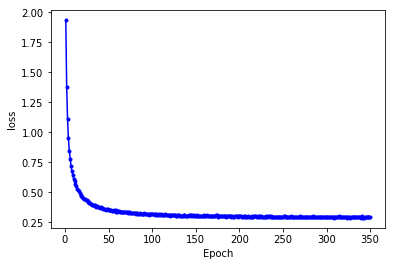

In [4]:
#lr = [0.01, 0.005, 0.001, 0.0005] # [0.005,0.001,0.0005,0.0001] may be better
lr = [0.005,0.001,0.0005,0.0001]
epoch = [200, 250, 300] # first20

run_num = 15 #2
net_name = 'Orig_ConvPool_CNN_C'

torch.cuda.set_device(1)

orig_convpool_cnn_c = help_func.running_model(run_num, orig_convpool_cnn_c, net_name, lr, 
                                      epoch,  loader_train, loader_val, loader_test)